In [4]:
import soundfile
import torch
from espnet_model_zoo.downloader import ModelDownloader
from espnet2.bin.asr_inference import Speech2Text

In [5]:
# encoder: transformer
# encoder_conf:
#     output_size: 512
#     attention_heads: 8
#     linear_units: 2048
#     num_blocks: 18
#     dropout_rate: 0.1
#     positional_dropout_rate: 0.1
#     attention_dropout_rate: 0.1
#     input_layer: conv2d6
#     normalize_before: true
# decoder: transformer
# decoder_conf:
#     attention_heads: 8
#     linear_units: 2048
#     num_blocks: 6
#     dropout_rate: 0.1
#     positional_dropout_rate: 0.1
#     self_attention_dropout_rate: 0.1
#     src_attention_dropout_rate: 0.1

In [6]:
d = ModelDownloader()
ASR_MODEL_PATH = "/home/jmpark/espnet/tools/anaconda/envs/espnet_1.7/lib/python3.8/site-packages/espnet_model_zoo/653d10049fdc264f694f57b49849343e/exp/asr_train_asr_transformer_e18_raw_bpe_sp/54epoch.pth"
LM_MODEL_PATH = "/home/jmpark/espnet/tools/anaconda/envs/espnet_1.7/lib/python3.8/site-packages/espnet_model_zoo/653d10049fdc264f694f57b49849343e/exp/lm_train_lm_adam_bpe/17epoch.pth"

In [7]:
# text, *_ = nbests[0]
# print(text)

In [8]:
TEST_DATA_PATH = "/home/jmpark/espnet/egs2/librispeech/asr1/data/dev_clean"
WAV_LIST_PATH = TEST_DATA_PATH + "/wav.scp"

file_name_list = []

with open(WAV_LIST_PATH, "r") as f:
    lines = f.readlines()
    for line in lines:
        num, name = line.split(' ')
        file_name_list.append(name[:-1])


In [9]:
import matplotlib.pyplot as plt

saved_images = []

def attn_encoder(self, input_tensor, output_tensor):
    cols = output_tensor[1].shape[1]

    for i in range(cols):
        img = output_tensor[1][0,i,:]
        saved_images.append(img)

def attn_decoder(self, input_tensor, output_tensor):
    print("DEOCDER")
    print("INPUT!!!")
    print(input_tensor)
    print("OUT!!!")
    print(output_tensor)
    print(output_tensor[0].shape)
    print(output_tensor[1].shape)

def print_encoder(self, input_tensor, output_tensor):
    print("\nENCODER!!!!!")
    print("\nINPUT TENSOR")
    if type(input_tensor) == type((1, 2)):
        print(type(input_tensor))
        print(len(input_tensor))
        for i in range(len(input_tensor)):
            print(input_tensor[i])

            if type(input_tensor[i]) == type(tensor_temp):
                print(input_tensor[i].shape)
    
    if type(input_tensor) == type(tensor_temp):
        print(input_tensor)
        print(type(input_tensor))
        print(input_tensor.shape)

    print("\nOUTPUT TENSOR")
    if type(output_tensor) == type((1, 2)):
        print(type(output_tensor))
        print(len(output_tensor))
        for i in range(len(output_tensor)):
            print(output_tensor[i])
            if type(output_tensor[i]) == type(tensor_temp):
                print(output_tensor[i].shape)       
    if type(output_tensor) == type(tensor_temp):
        print(output_tensor)
        print(type(output_tensor))
        print(output_tensor.shape)

def print_decoder(self, input_tensor, output_tensor):
    print("\nDECODER!!!!!")
    print("\nINPUT TENSOR")
    if type(input_tensor) == type((1, 2)):
        print(type(input_tensor))
        print(len(input_tensor))
        for i in range(len(input_tensor)):
            print(input_tensor[i])

            if type(input_tensor[i]) == type(tensor_temp):
                print(input_tensor[i].shape)
    
    if type(input_tensor) == type(tensor_temp):
        print(input_tensor)
        print(type(input_tensor))
        print(input_tensor.shape)

    print("\nOUTPUT TENSOR")
    if type(output_tensor) == type((1, 2)):
        print(type(output_tensor))
        print(len(output_tensor))
        for i in range(len(output_tensor)):
            print(output_tensor[i])
            if type(output_tensor[i]) == type(tensor_temp):
                print(output_tensor[i].shape)       
    if type(output_tensor) == type(tensor_temp):
        print(output_tensor)
        print(type(output_tensor))
        print(output_tensor.shape)


In [10]:
speech2text = Speech2Text(
    **d.download_and_unpack('Shinji Watanabe/librispeech_asr_train_asr_transformer_e18_raw_bpe_sp_valid.acc.best'),
    # Decoding parameters are not included in the model file
    maxlenratio=0.0,
    minlenratio=0.0,
    beam_size=1,
    ctc_weight=0.4,
    lm_weight=0.6,
    penalty=0.0,
    nbest=1
)

net = speech2text.asr_model

In [11]:
for name, parameter in net.named_modules():
    print(name)



frontend
frontend.stft
frontend.frontend
frontend.logmel
specaug
specaug.time_warp
specaug.freq_mask
specaug.time_mask
normalize
encoder
encoder.embed
encoder.embed.conv
encoder.embed.conv.0
encoder.embed.conv.1
encoder.embed.conv.2
encoder.embed.conv.3
encoder.embed.out
encoder.embed.out.0
encoder.embed.out.1
encoder.embed.out.1.dropout
encoder.encoders
encoder.encoders.0
encoder.encoders.0.self_attn
encoder.encoders.0.self_attn.linear_q
encoder.encoders.0.self_attn.linear_k
encoder.encoders.0.self_attn.linear_v
encoder.encoders.0.self_attn.linear_out
encoder.encoders.0.self_attn.dropout
encoder.encoders.0.feed_forward
encoder.encoders.0.feed_forward.w_1
encoder.encoders.0.feed_forward.w_2
encoder.encoders.0.feed_forward.dropout
encoder.encoders.0.feed_forward.activation
encoder.encoders.0.norm1
encoder.encoders.0.norm2
encoder.encoders.0.dropout
encoder.encoders.1
encoder.encoders.1.self_attn
encoder.encoders.1.self_attn.linear_q
encoder.encoders.1.self_attn.linear_k
encoder.encoder

In [12]:
for name, parameter in net.named_modules():

    for i in range(18): 
        if 'encoder.encoders.'+ str(i) +'.self_attn' == name:
            print(name)
            print(parameter)
            parameter.register_forward_hook(attn_encoder)


encoder.encoders.0.self_attn
MultiHeadedAttention(
  (linear_q): Linear(in_features=512, out_features=512, bias=True)
  (linear_k): Linear(in_features=512, out_features=512, bias=True)
  (linear_v): Linear(in_features=512, out_features=512, bias=True)
  (linear_out): Linear(in_features=512, out_features=512, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)
encoder.encoders.1.self_attn
MultiHeadedAttention(
  (linear_q): Linear(in_features=512, out_features=512, bias=True)
  (linear_k): Linear(in_features=512, out_features=512, bias=True)
  (linear_v): Linear(in_features=512, out_features=512, bias=True)
  (linear_out): Linear(in_features=512, out_features=512, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)
encoder.encoders.2.self_attn
MultiHeadedAttention(
  (linear_q): Linear(in_features=512, out_features=512, bias=True)
  (linear_k): Linear(in_features=512, out_features=512, bias=True)
  (linear_v): Linear(in_features=512, out_features=512, bias=True)
  (linear_out): 

In [13]:
audio_num = 5
speech, rate = soundfile.read(file_name_list[audio_num])
print(file_name_list[audio_num])
out = speech2text(speech)

/home_data/jmpark/librispeech/LibriSpeech/dev-clean/1272/128104/1272-128104-0005.flac


process 0 layer images....


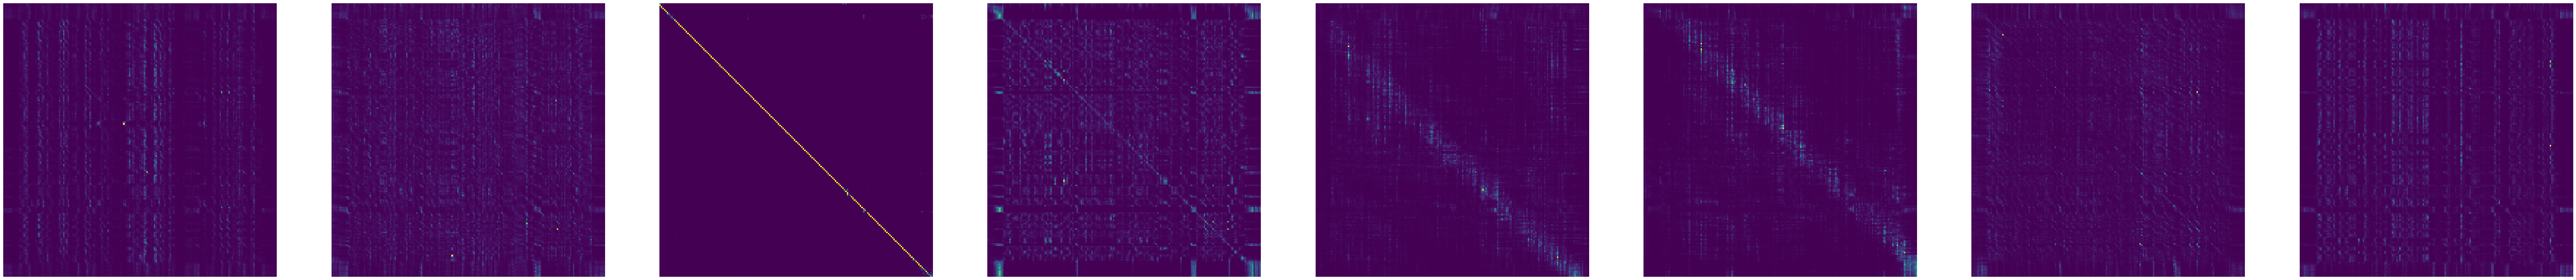

process 1 layer images....


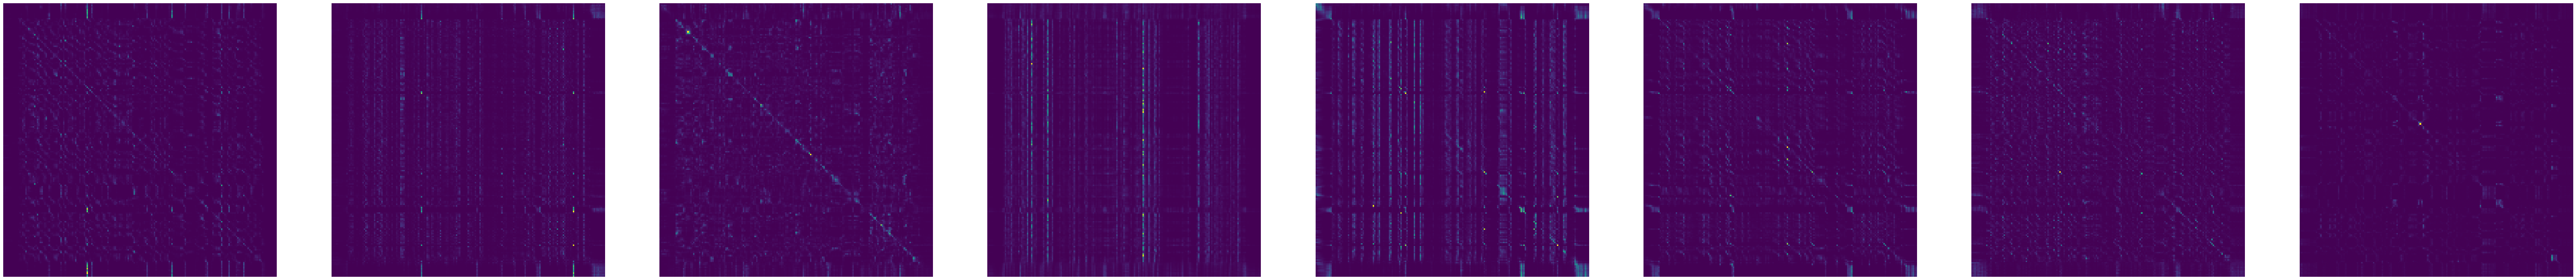

process 2 layer images....


KeyboardInterrupt: 

In [14]:
img_size = saved_images[0].shape[0]

fig_saved_dir = '/home/jmpark/espnet/egs2/jm_test/asr/feature_images/'
rows = 18
cols = 8

for j in range(rows):
    fig = plt.figure(figsize=(100,100))
    axes = []
    for i in range(cols):
        img = saved_images[j*cols+i]
        axes.append(fig.add_subplot(1, cols, i+1))
        plt.imshow(img)
        plt.axis('off')

    print('process {0} layer images....'.format(j))
    plt.savefig(fig_saved_dir + 'audio' + str(audio_num) +'_encoder_layer{0}_attention.png'.format(j),
                bbox_inches='tight',
                dpi=100)
    plt.show() 